## (1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.

In [56]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

In [57]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float) ### 수정된부분
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            #print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        #print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

In [58]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

In [59]:
import numpy as np
centroids = np.array([[-3,3], [-3,8], [2,4], [2,1]], dtype = float) #임의의 중심점
centroids, clusterAssigned = cluster(X,4,centroids)



====== Iteration 1 ======

.....Updating Centroids
 [[-3.  3.]
 [-3.  8.]
 [ 2.  4.]
 [ 2.  1.]] => 
[[-1.63043905  3.09879034]
 [-1.27208964  7.74944718]
 [ 0.78627354  4.2491454 ]
 [ 1.97918933  0.97920012]]


====== Iteration 2 ======

.....Updating Centroids
 [[-1.63043905  3.09879034]
 [-1.27208964  7.74944718]
 [ 0.78627354  4.2491454 ]
 [ 1.97918933  0.97920012]] => 
[[-1.5772186   3.11456071]
 [-1.27208964  7.74944718]
 [ 0.83044547  4.27831711]
 [ 1.97918933  0.97920012]]


====== Iteration 3 ======

.....NOT Updating Centroids
 [[-1.5772186   3.11456071]
 [-1.27208964  7.74944718]
 [ 0.83044547  4.27831711]
 [ 1.97918933  0.97920012]] => 
[[-1.5772186   3.11456071]
 [-1.27208964  7.74944718]
 [ 0.83044547  4.27831711]
 [ 1.97918933  0.97920012]]


### 3회만에 중심값을 찾았다.

## (2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

### 원본 cluster

In [60]:
y

array([0, 3, 0, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       2, 1, 0, 2, 2, 0, 1, 1, 1, 3, 1, 1, 2, 0, 3, 1, 3, 2, 0, 2, 3, 2,
       2, 3, 1, 2, 0, 0, 0, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 2, 0, 1, 2, 1, 1,
       0, 0, 0, 2, 0, 2, 2, 3, 3, 2, 3, 0])

In [65]:
import matplotlib.pyplot as plt
def draw(x,y):
  plt.scatter(x[np.where(y==0),0],x[np.where(y==0),1],color='blue')
  plt.scatter(x[np.where(y==1),0],x[np.where(y==1),1],color='red')
  plt.scatter(x[np.where(y==2),0],x[np.where(y==2),1],color='green')
  plt.scatter(x[np.where(y==3),0],x[np.where(y==3),1],color='cyan')

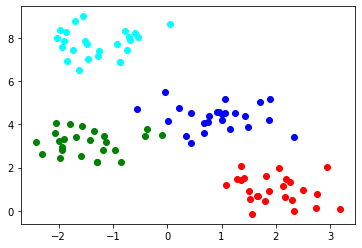

In [66]:
draw(X,y)

### centroid로 구성한 배정된 cluster

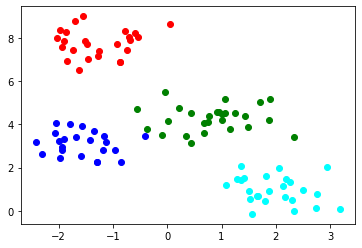

In [67]:
draw(X, clusterAssigned[:,0])

### 초록색 cluster에서 파란색 cluster와 맞닿는 부분 몇개 data가 잘 분류되지 않았지만 나머지는 올바르게 분류되었다.